In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('/content/Train.csv')

In [4]:
test = pd.read_csv('/content/Test.csv')

In [5]:
train.head()

,ID,Reason for absence,Month of absence,Day of the week,Weather,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Unnamed: 21
0,Emp1,unjustified absence,7,3,0.0,164,12,13,39.0,316665,89,0,1.0,2,0.0,0.0,1,91,175.0,30,4,NaN
1,Emp2,External causes of morbidity and mortality,7,3,2.0,108,15,18,37.0,386543,92,0,1.0,2,0.0,0.0,0,62,164.0,23,0,NaN
2,Emp3,medical consultatio,7,4,0.0,327,40,18,43.0,397159,91,1,3.0,3,0.0,0.0,0,55,164.0,20,2,NaN
3,Emp4,eye and adnexa,7,5,0.0,316,27,14,42.0,270671,90,0,1.0,2,1.0,1.0,0,84,180.0,26,4,NaN
4,Emp5,medical consultatio,7,5,1.0,277,18,13,44.0,244390,86,0,3.0,0,1.0,1.0,1,88,176.0,28,2,NaN


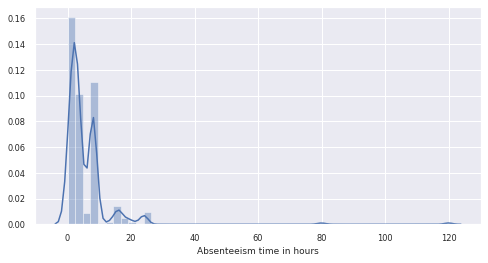

In [40]:
plt.figure(figsize=(8,4))
sns.distplot(train["Absenteeism time in hours"])

In [6]:
print('Train Set Columns: ',train.columns)
print('\nTrain Shape: ',train.shape)
print('\nTrain Unique Features: ',train.nunique())

Train Set Columns:  Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Weather', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Unnamed: 21'],
      dtype='object')

Train Shape:  (619, 22)

Train Unique Features:  ID                                 608
Reason for absence                  28
Month of absence                     1
Day of the week                      5
Weather                              3
Transportation expense             257
Distance from Residence to Work     48
Service time                        18
Age                                 26
Work load Average/day              608
Hit target                          20
Disciplinary failure                 2
Education                 

In [7]:
print('Test Set Columns: ',test.columns)
print('\nTest Shape: ',test.shape)
print('\nTest Unique Features: ',test.nunique())

Test Set Columns:  Index(['S. ID.', 'ID', 'Reason for absence', 'Month of absence',
       'Day of the week', 'Weather', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
       'Height', 'Body mass index', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

Test Shape:  (135, 23)

Test Unique Features:  S. ID.                             135
ID                                 135
Reason for absence                  21
Month of absence                     1
Day of the week                      5
Weather                              3
Transportation expense             106
Distance from Residence to Work     41
Service time                        16
Age                                 25
Work load Average/day              135
Hit target                          20
Disciplinary failure             

In [8]:
train.isnull().sum()

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Weather                             42
Transportation expense               0
Distance from Residence to Work      0
Service time                         0
Age                                  1
Work load Average/day                0
Hit target                           0
Disciplinary failure                 0
Education                            5
Son                                  0
Social drinker                       2
Social smoker                        1
Pet                                  0
Weight                               0
Height                              22
Body mass index                      0
Absenteeism time in hours            0
Unnamed: 21                        619
dtype: int64

In [9]:
test.isnull().sum()

S. ID.                               0
ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Weather                             11
Transportation expense               0
Distance from Residence to Work      0
Service time                         0
Age                                  0
Work load Average/day                0
Hit target                           0
Disciplinary failure                 0
Education                            1
Son                                  0
Social drinker                       2
Social smoker                        1
Pet                                  0
Weight                               0
Height                               6
Body mass index                      0
Unnamed: 21                        135
Unnamed: 22                        135
dtype: int64

In [10]:
train['Reason for absence'].value_counts()

medical consultatio                                                       118
dental consultation                                                        84
physiotherapy                                                              56
digestive system                                                           40
musculoskeletal system and connective tissue                               39
External causes of morbidity and mortality                                 37
Injury, poisoning                                                          35
patient follow-up                                                          31
unjustified absence                                                        27
laboratory examination                                                     27
respiratory system                                                         20
Symptoms, signs and abnormal clinical and laboratory findings              16
genitourinary syste                                             

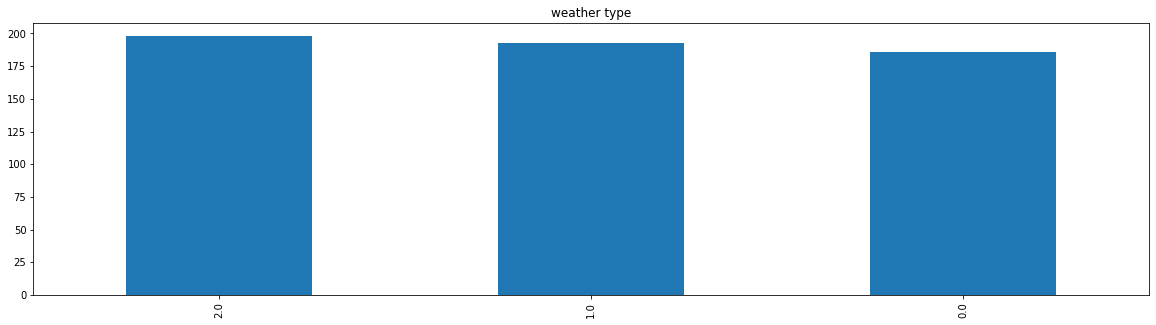

In [11]:
train['Weather'].value_counts().plot.bar(figsize=(20,5),title='weather type')

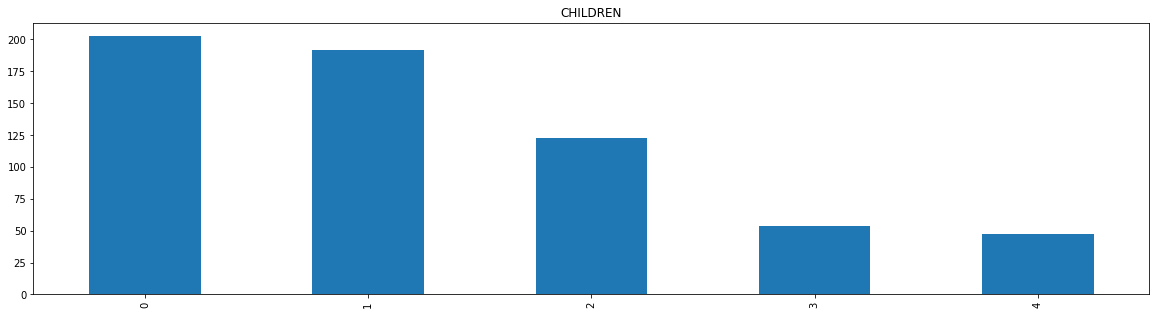

In [12]:
train['Son'].value_counts().plot.bar(figsize=(20,5),title='CHILDREN')

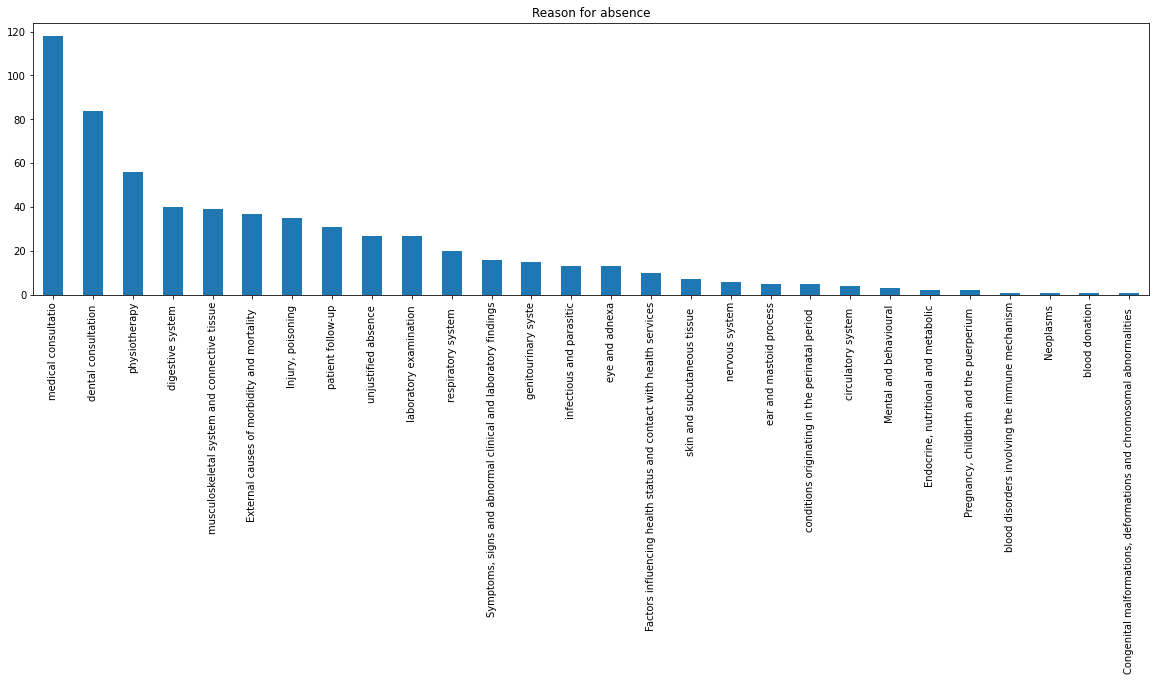

In [13]:
train['Reason for absence'].value_counts().plot.bar(figsize=(20,5),title = 'Reason for absence')

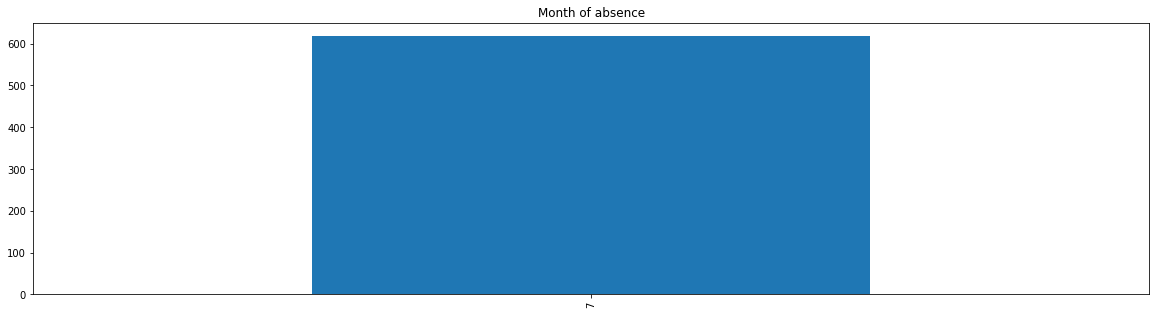

In [14]:
train['Month of absence'].value_counts().plot.bar(figsize=(20,5),title='Month of absence')

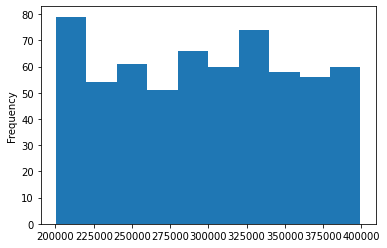

In [15]:
train['Work load Average/day '].plot.hist()

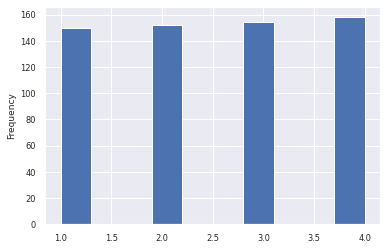

In [34]:
train['Education'].plot.hist()

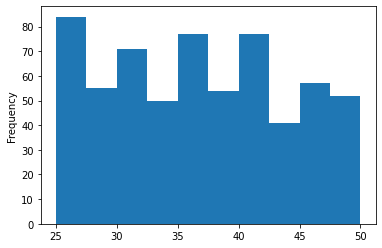

In [16]:
train['Age'].plot.hist()

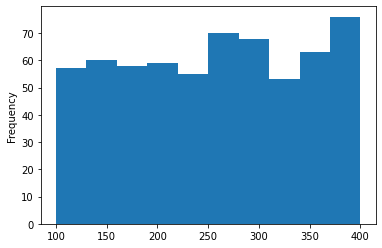

In [17]:
train['Transportation expense'].plot.hist()

BIVARIATE ANALYSIS

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

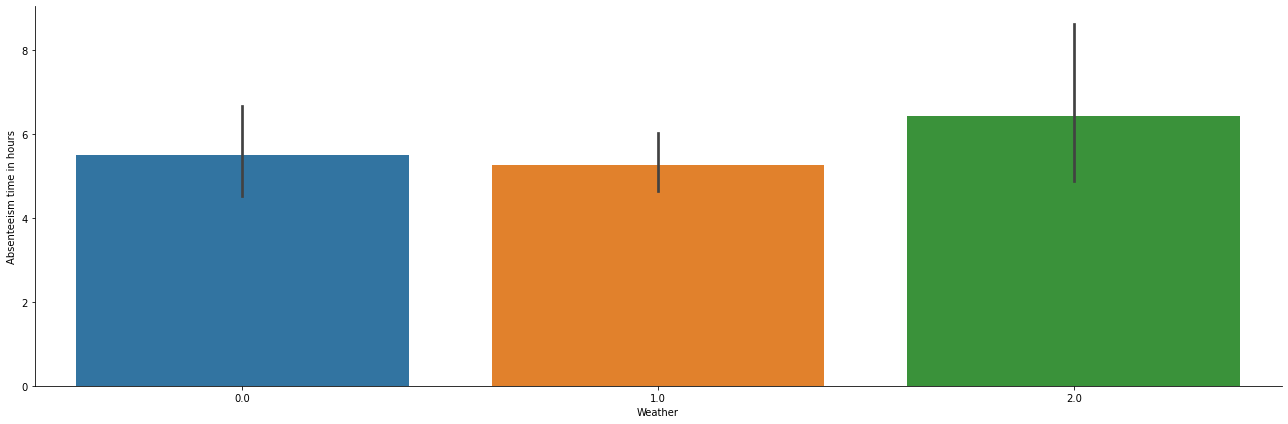

In [18]:
plt.figure(figsize=(20,8))
sns.factorplot('Weather', 'Absenteeism time in hours', data=train,kind='bar',aspect=3, size = 6)

People tend have most Absenteeism time when the weather is compared to windy. Followed by Sunny and least during rainy days.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

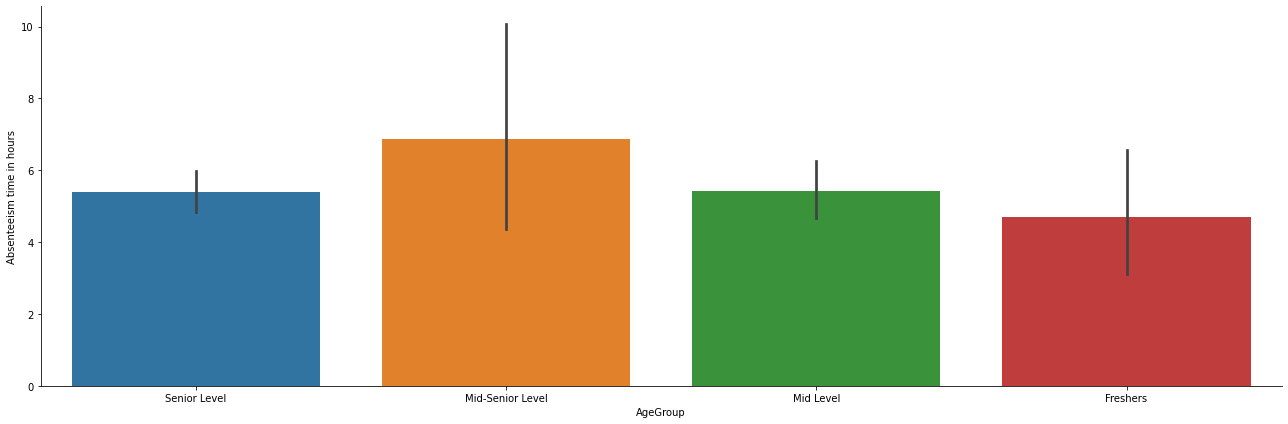

In [19]:
age_df = pd.DataFrame()
age_df['AgeGroup'] =  ['Childen' if x<18 else 'Freshers' if x>=18 and x<26
                       else 'Mid Level' if x>=27 and x<33  else 'Mid-Senior Level' if x>=34 and x<39 
                       else 'Senior Level'  
                       for x in train['Age']]
age_df['Absenteeism time in hours'] = train['Absenteeism time in hours']

plt.figure(figsize=(20,8))
sns.factorplot('AgeGroup', 'Absenteeism time in hours', data=age_df,kind='bar',aspect=3, size = 6)

If ages are classified into bands, we see Mid-Senior Level employees tend to have more on leave than any other bands , followed by Senior and Mid level employees



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

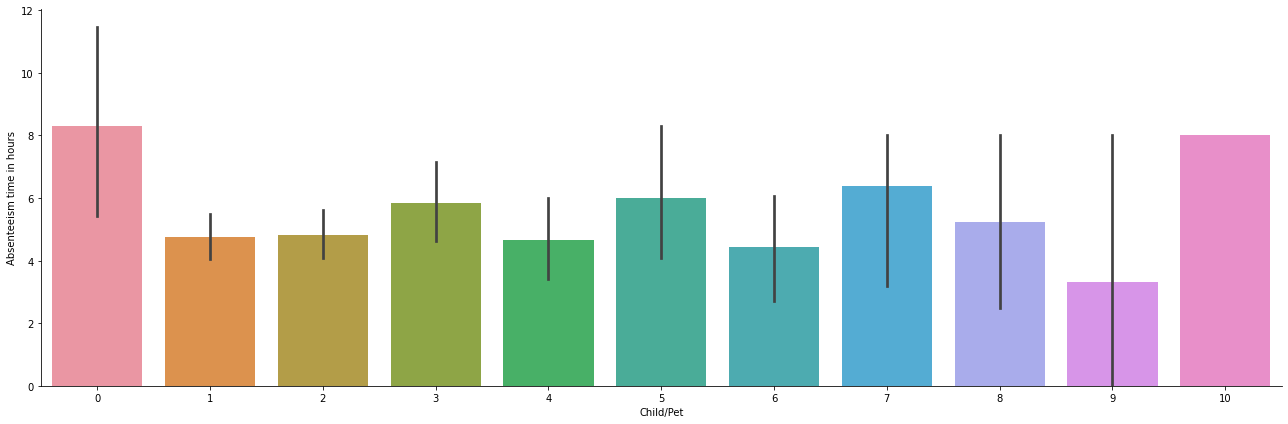

In [20]:
train['Child/Pet'] = train['Son'] + train['Pet']
plt.figure(figsize=(20,8))
sns.factorplot('Child/Pet', 'Absenteeism time in hours', data=train,kind='bar',aspect=3, size = 6)

Also we see employee who has no child/pet tend to take more hours of leave than others followed by employees who have the most.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

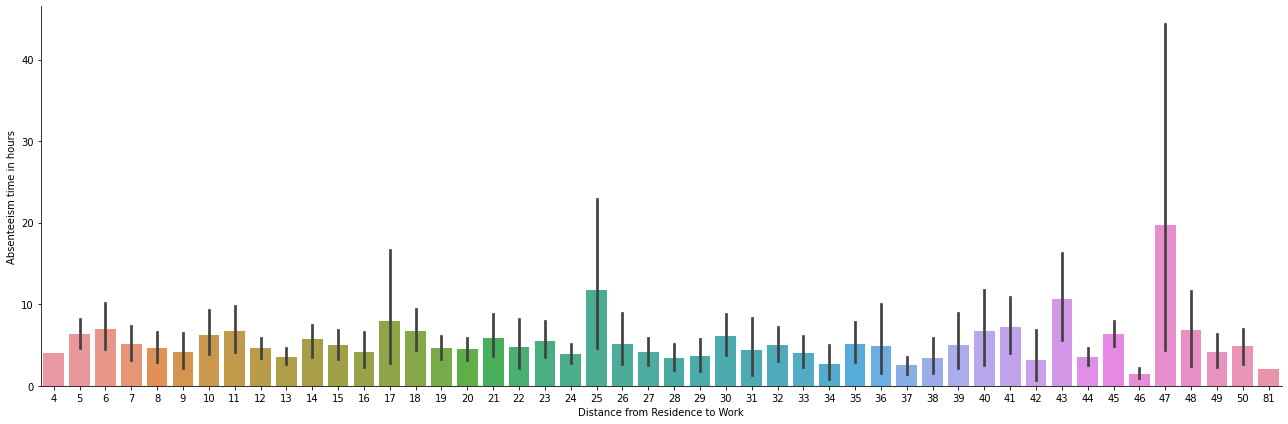

In [21]:
plt.figure(figsize=(20,8))
sns.factorplot('Distance from Residence to Work', 'Absenteeism time in hours', data=train,kind='bar',aspect=3, size = 6)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1728x576 with 0 Axes>

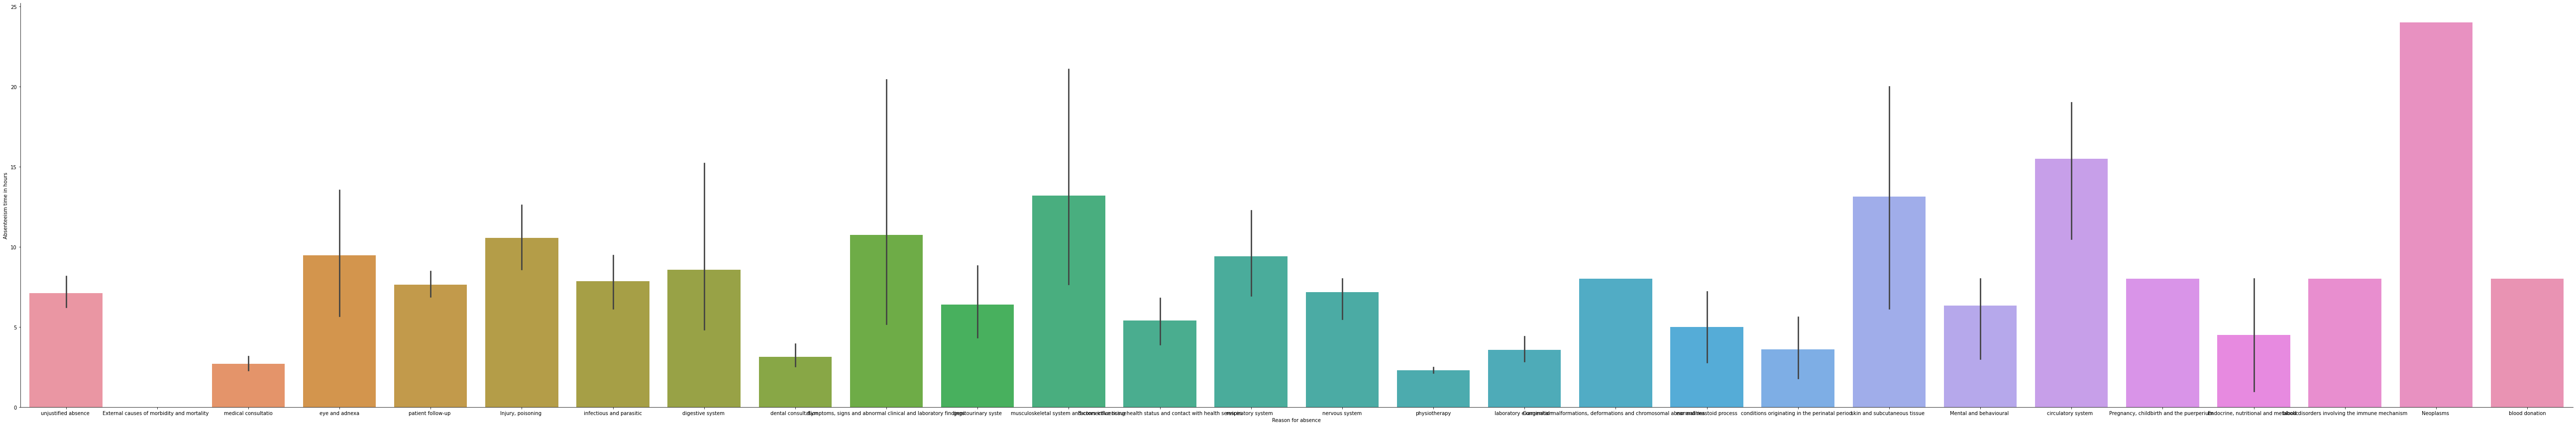

In [22]:
plt.figure(figsize=(24,8))
sns.factorplot('Reason for absence', 'Absenteeism time in hours', data=train,kind='bar',aspect=6, size = 12)

In [24]:
#People who have Neoplasms followed by Circulatory Systems take most hours of time to get back to work.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x576 with 0 Axes>

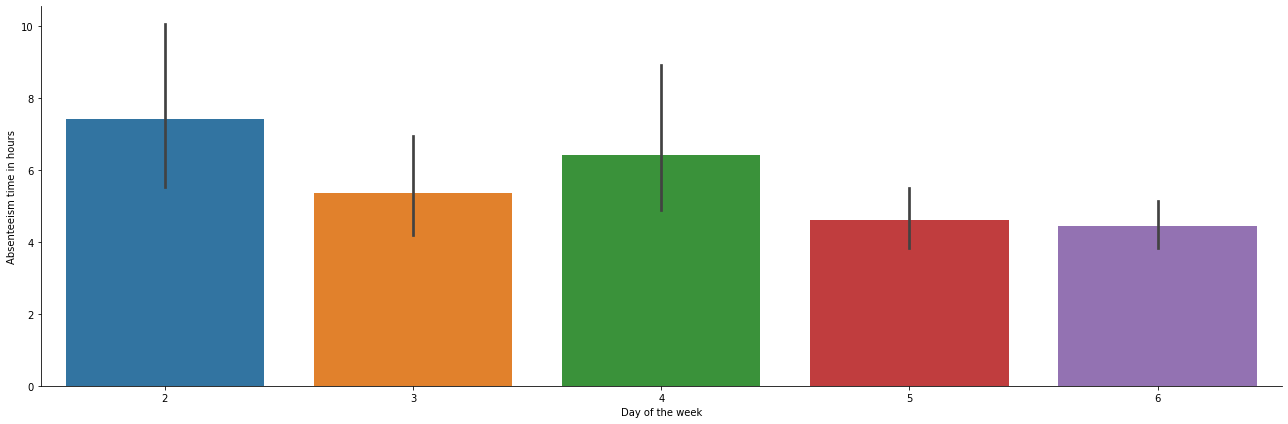

In [25]:
plt.figure(figsize=(20,8))
sns.factorplot('Day of the week', 'Absenteeism time in hours', data=train,kind='bar',aspect=3, size = 6)

And people takes most work off on Monday comapred to any other days.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


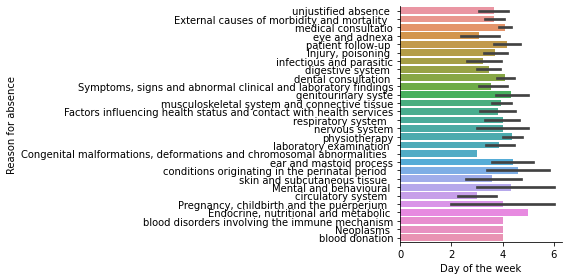

In [26]:

sns.factorplot('Day of the week','Reason for absence', data=train,kind='bar',aspect=2, size = 4)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1728x576 with 0 Axes>

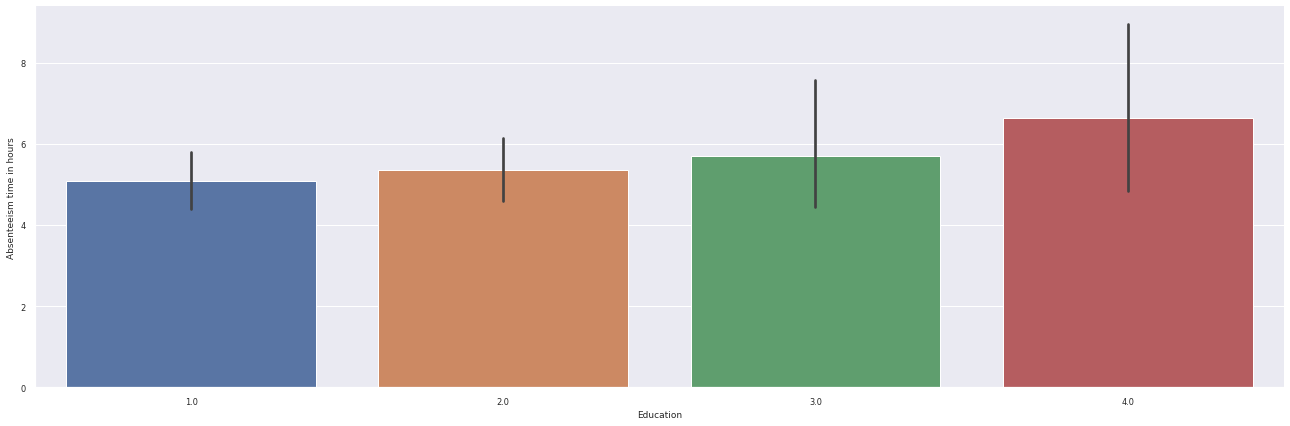

In [36]:
plt.figure(figsize=(24,8))
sns.factorplot('Education', 'Absenteeism time in hours', data=train,kind='bar',aspect=3, size = 6)

In [164]:
#Dropping unwanted columns

df_train = train.drop(['Son','Pet','Unnamed: 21'], axis = 1)
test['Child/Pet'] = test['Son'] + test['Pet']
df_test = test.drop(['Son','Pet','Unnamed: 21'], axis = 1)

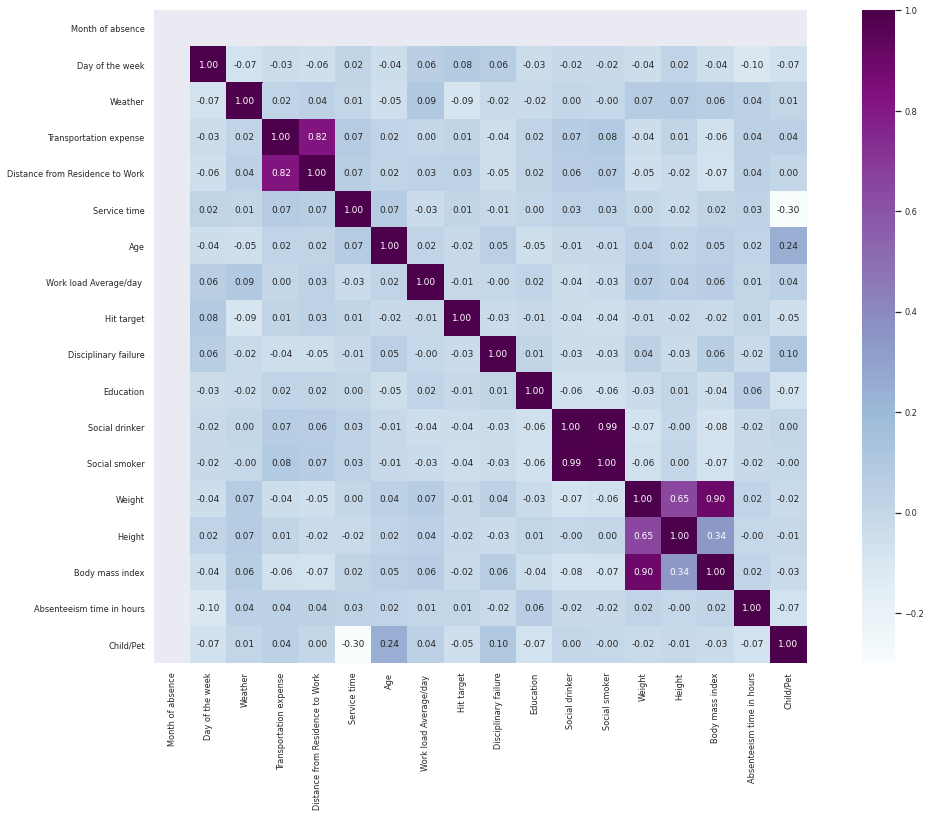

In [89]:
matrix=df_train.corr()
f,ax=plt.subplots(figsize=(20,12))
sns.set(font_scale=0.75)
sns.heatmap(matrix,vmax=1, annot=True, square=True, fmt='.2f',cmap="BuPu")

 
*   We see that the people who are socially smoker is also socially drinker . So we can drop those columns .
*   Also, BMI Index is given which is highly correlated to Height and weight can be dropped. 
*   Transporation expense is highly correlated to Distance from residence so we can drop the column transportation expense which has high missing values
Also month as it has ony one 






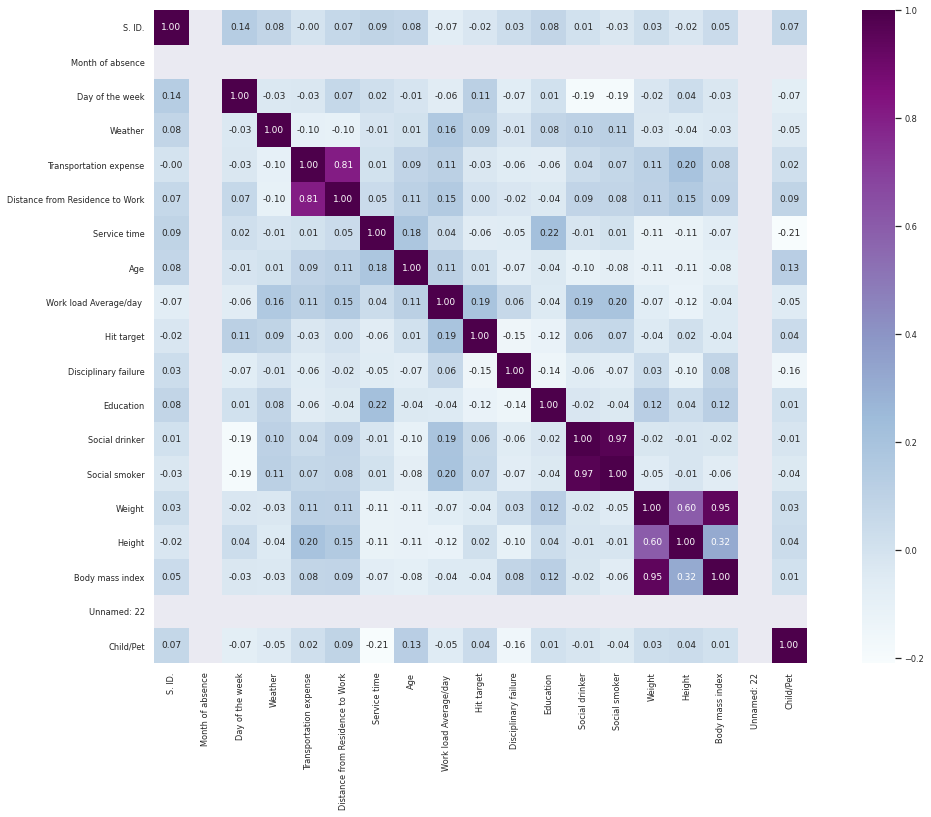

In [54]:
matrix=df_test.corr()
f,ax=plt.subplots(figsize=(20,12))
sns.set(font_scale=0.75)
sns.heatmap(matrix,vmax=1, annot=True, square=True, fmt='.2f',cmap="BuPu")

In [165]:
#Dropping unwanted columns

df_train = df_train.drop(['Height','Weight','Social drinker','Month of absence'], axis = 1)
df_test = df_test.drop(['Height','Weight','Social drinker','Month of absence','Unnamed: 22'], axis = 1)

In [166]:
df_train.isnull().sum()

ID                                  0
Reason for absence                  0
Day of the week                     0
Weather                            42
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 1
Work load Average/day               0
Hit target                          0
Disciplinary failure                0
Education                           5
Social smoker                       1
Body mass index                     0
Absenteeism time in hours           0
Child/Pet                           0
dtype: int64

In [167]:
#Dropping Duplicates
print('Shape:',df_train.shape)
df_train = df_train.drop_duplicates(keep=False,inplace = False)
print('After droping dupcilates Shape:',df_train.shape)

Shape: (619, 16)
After droping dupcilates Shape: (619, 16)


In [168]:
#Dropping Duplicates
print('Shape:',df_test.shape)
df_test = df_test.drop_duplicates(keep=False,inplace = False)
print('After droping dupcilates Shape:',df_test.shape)

Shape: (135, 16)
After droping dupcilates Shape: (135, 16)


In [169]:
#Imputing Missing values
# fill missing values with mean column values
df_train_x = df_train.fillna(df_train.median())
# count the number of NaN values in each column
print(df_train_x.isnull().sum())

ID                                 0
Reason for absence                 0
Day of the week                    0
Weather                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Social smoker                      0
Body mass index                    0
Absenteeism time in hours          0
Child/Pet                          0
dtype: int64


In [170]:
#Imputing Missing values
# fill missing values with mean column values
df_test_x = df_test.fillna(df_test.median())
# count the number of NaN values in each column
print(df_test_x.isnull().sum())

S. ID.                             0
ID                                 0
Reason for absence                 0
Day of the week                    0
Weather                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Social smoker                      0
Body mass index                    0
Child/Pet                          0
dtype: int64


In [171]:
train_unique_codes = df_train_x.ID.values
test_unique_codes = df_test_x.ID.values
df_train_x = df_train_x.drop(['ID'],axis = 1)
df_test_x = df_test_x.drop(['ID','S. ID.'],axis = 1)

In [172]:
train_X_categorical = df_train_x.select_dtypes(include = 'object')
test_X_categorical = df_test_x.select_dtypes(include = 'object')
print("Train Columns: ", train_X_categorical.columns)
print("Test Columns: ", test_X_categorical.columns)

Train Columns:  Index(['Reason for absence'], dtype='object')
Test Columns:  Index(['Reason for absence'], dtype='object')


In [187]:
train_obj_cols = train_X_categorical.columns
test_obj_cols = test_X_categorical.columns
train_df = df_train_x.drop(train_obj_cols,axis = 1)
test_df = df_test_x.drop(test_obj_cols,axis = 1)

In [188]:
print('Train Shape',train_df.shape)
print('Test Shape',test_df.shape)

Train Shape (619, 14)
Test Shape (135, 13)


In [189]:
# also the unique number of categorical values aren't same, which results in different test and train shape
train_len = train_df.shape[0]

# Combining the two categorical datsets one after the other
combined = pd.concat([train_X_categorical,test_X_categorical],ignore_index=True, sort = False)
categorical_cols = combined.columns


# Creating Label Encoded values for the categorical values avoid the dummy variable trap
dummies = pd.get_dummies(combined, columns=categorical_cols,  drop_first = True)

# Seperating the datasets from combined dataset
train_dummies = dummies[:train_len]
test_dummies = dummies[train_len:]

In [190]:
print('Train Shape',train_df.shape)
print('Test Shape',test_df.shape)

Train Shape (619, 14)
Test Shape (135, 13)


In [191]:
print('Train Shape',train_dummies.shape)
print('Test Shape',test_dummies.shape)

Train Shape (619, 27)
Test Shape (135, 27)


In [192]:
# Concatenating with the main DataFrame
train_df.reset_index(drop=True, inplace=True)
df_train = pd.concat([train_df,train_dummies],axis = 1)
print(df_train.shape)

(619, 41)


In [193]:
test_df.reset_index(drop=True, inplace=True)
test_dummies.reset_index(drop=True, inplace=True)
df_test = pd.concat([test_df,test_dummies],axis = 1)

In [194]:
print('Train Shape',df_train.shape)
print('Test Shape',df_test.shape)

Train Shape (619, 41)
Test Shape (135, 40)


In [181]:
df_train.head()

,Day of the week,Weather,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Social smoker,Body mass index,Absenteeism time in hours,Child/Pet,"Reason for absence_Endocrine, nutritional and metabolic",Reason for absence_External causes of morbidity and mortality,Reason for absence_Factors influencing health status and contact with health services,"Reason for absence_Injury, poisoning",Reason for absence_Mental and behavioural,Reason for absence_Neoplasms,"Reason for absence_Pregnancy, childbirth and the puerperium","Reason for absence_Symptoms, signs and abnormal clinical and laboratory findings",Reason for absence_blood disorders involving the immune mechanism,Reason for absence_blood donation,Reason for absence_circulatory system,Reason for absence_conditions originating in the perinatal period,Reason for absence_dental consultation,Reason for absence_digestive system,Reason for absence_ear and mastoid process,Reason for absence_eye and adnexa,Reason for absence_genitourinary syste,Reason for absence_infectious and parasitic,Reason for absence_laboratory examination,Reason for absence_medical consultatio,Reason for absence_musculoskeletal system and connective tissue,Reason for absence_nervous system,Reason for absence_patient follow-up,Reason for absence_physiotherapy,Reason for absence_respiratory system,Reason for absence_skin and subcutaneous tissue,Reason for absence_unjustified absence
0,3,0.0,164,12,13,39.0,316665,89,0,1.0,0.0,30,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,2.0,108,15,18,37.0,386543,92,0,1.0,0.0,23,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0.0,327,40,18,43.0,397159,91,1,3.0,0.0,20,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,5,0.0,316,27,14,42.0,270671,90,0,1.0,1.0,26,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,1.0,277,18,13,44.0,244390,86,0,3.0,1.0,28,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [182]:
df_test.head()

,Day of the week,Weather,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Social smoker,Body mass index,Child/Pet,"Reason for absence_Endocrine, nutritional and metabolic",Reason for absence_External causes of morbidity and mortality,Reason for absence_Factors influencing health status and contact with health services,"Reason for absence_Injury, poisoning",Reason for absence_Mental and behavioural,Reason for absence_Neoplasms,"Reason for absence_Pregnancy, childbirth and the puerperium","Reason for absence_Symptoms, signs and abnormal clinical and laboratory findings",Reason for absence_blood disorders involving the immune mechanism,Reason for absence_blood donation,Reason for absence_circulatory system,Reason for absence_conditions originating in the perinatal period,Reason for absence_dental consultation,Reason for absence_digestive system,Reason for absence_ear and mastoid process,Reason for absence_eye and adnexa,Reason for absence_genitourinary syste,Reason for absence_infectious and parasitic,Reason for absence_laboratory examination,Reason for absence_medical consultatio,Reason for absence_musculoskeletal system and connective tissue,Reason for absence_nervous system,Reason for absence_patient follow-up,Reason for absence_physiotherapy,Reason for absence_respiratory system,Reason for absence_skin and subcutaneous tissue,Reason for absence_unjustified absence
0,4,1.0,179,12,11,42,385647,94,1,2.0,0.0,20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,1.0,196,40,18,41,374494,95,0,3.0,0.0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2.0,221,16,3,30,236636,85,1,1.0,1.0,31,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0.0,295,22,12,27,330370,96,0,3.0,0.0,25,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1.0,398,49,10,28,314810,90,1,3.0,1.0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [184]:
# df_train['EMP_ID']  = train_unique_codes
# df_test['EMP_ID'] = test_unique_codes

In [185]:
df_train.head()

,Day of the week,Weather,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Social smoker,Body mass index,Absenteeism time in hours,Child/Pet,"Reason for absence_Endocrine, nutritional and metabolic",Reason for absence_External causes of morbidity and mortality,Reason for absence_Factors influencing health status and contact with health services,"Reason for absence_Injury, poisoning",Reason for absence_Mental and behavioural,Reason for absence_Neoplasms,"Reason for absence_Pregnancy, childbirth and the puerperium","Reason for absence_Symptoms, signs and abnormal clinical and laboratory findings",Reason for absence_blood disorders involving the immune mechanism,Reason for absence_blood donation,Reason for absence_circulatory system,Reason for absence_conditions originating in the perinatal period,Reason for absence_dental consultation,Reason for absence_digestive system,Reason for absence_ear and mastoid process,Reason for absence_eye and adnexa,Reason for absence_genitourinary syste,Reason for absence_infectious and parasitic,Reason for absence_laboratory examination,Reason for absence_medical consultatio,Reason for absence_musculoskeletal system and connective tissue,Reason for absence_nervous system,Reason for absence_patient follow-up,Reason for absence_physiotherapy,Reason for absence_respiratory system,Reason for absence_skin and subcutaneous tissue,Reason for absence_unjustified absence,EMP_ID
0,3,0.0,164,12,13,39.0,316665,89,0,1.0,0.0,30,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Emp1
1,3,2.0,108,15,18,37.0,386543,92,0,1.0,0.0,23,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Emp2
2,4,0.0,327,40,18,43.0,397159,91,1,3.0,0.0,20,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Emp3
3,5,0.0,316,27,14,42.0,270671,90,0,1.0,1.0,26,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Emp4
4,5,1.0,277,18,13,44.0,244390,86,0,3.0,1.0,28,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Emp5


In [198]:
train_y =  df_train['Absenteeism time in hours']
df_train = df_train.drop(['Absenteeism time in hours'],axis = 1)

In [199]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler().fit(df_train)
train_X = scaler_x.transform(df_train)
test_X = scaler_x.transform(df_test)

In [200]:
print('Train Shape',train_X.shape)
print('Test Shape',test_X.shape)

Train Shape (619, 40)
Test Shape (135, 40)


In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [204]:
X_train,X_val,Y_train,Y_val = train_test_split(train_X,train_y,test_size =0.2,random_state = 42)

In [207]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))

results = []
names = []

for name,model in pipelines:
    kFold = KFold(n_splits = 10 , random_state =21)
    cv_results = cross_val_score(model , X_train,Y_train, cv = kFold, scoring = 'neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    result = "%s : MeanError: %f  Std: (%f)" %(name,cv_results.mean(),cv_results.std())
    print(result)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

ScaledLR : MeanError: -860443730972965688773181440.000000  Std: (1793013448179185185753923584.000000)
ScaledLASSO : MeanError: -56.991645  Std: (83.971361)
ScaledEN : MeanError: -54.684561  Std: (82.478407)
ScaledKNN : MeanError: -58.472743  Std: (73.271670)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART : MeanError: -130.197857  Std: (122.202752)
ScaledGBM : MeanError: -71.622557  Std: (99.076642)
